In [1]:
import sys
import os
import scanpy as sc
import pandas as pd

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [8]:
# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object on the transcript level
def get_sc_transcript_adata():
    fname = '../processing/scanpy/sc_transcript_raw.h5ad'
    adata = sc.read(fname)
    
    return adata

# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object
def get_sc_gene_adata():
    fname = '../processing/scanpy/sc_gene.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tss_adata():
    fname = '../processing/scanpy/sc_tss.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tes_adata():
    fname = '../processing/scanpy/sc_tes.h5ad'
    adata = sc.read(fname)
    
    return adata

### Number of genes with > 1 isoform / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.009580225327262978
Slope of MB_nuclei correlation: 0.0018648428880349297
Slope of MT_nuclei correlation: 0.001249855683765882


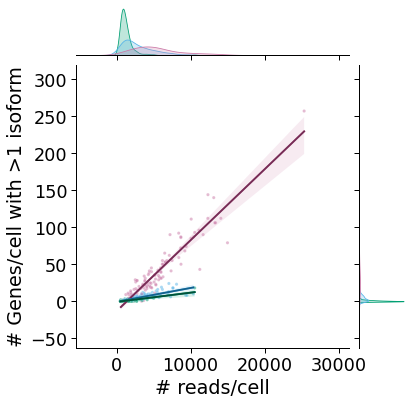

In [3]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()qa
opref = 'figures/dt_v_randhex'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='iso', opref='figures/lr')

### Number of genes with >1 TSS / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.01761262030596631
Slope of MB_nuclei correlation: 0.007880287703592202
Slope of MT_nuclei correlation: 0.006814909879803799


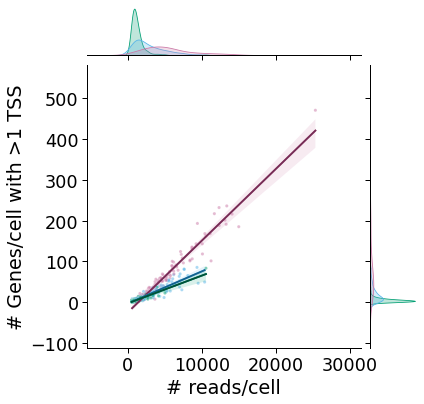

In [7]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/dt_v_randhex'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tss', opref='figures/lr')

### Number of genes w/ >1 TES per cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.01761262030596631
Slope of MB_nuclei correlation: 0.007880287703592202
Slope of MT_nuclei correlation: 0.006814909879803799


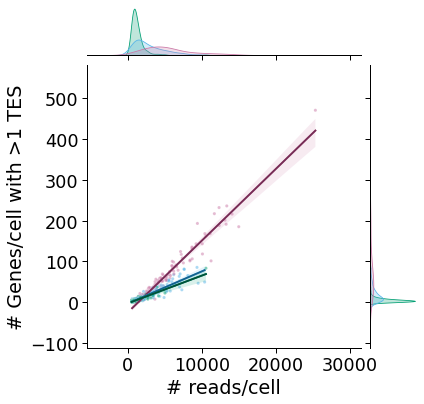

In [10]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/dt_v_randhex'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tes', opref='figures/lr')